# Enumerating k-mers Lexicographically

**Problem**
Assume that an alphabet 𝒜 has a predetermined order; that is, we write the alphabet as a permutation 𝒜=(a1,a2,…,ak), where a1<a2<⋯<ak. For instance, the English alphabet is organized as (A,B,…,Z). 

Given two strings s and t having the same length n, we say that s precedes t in the lexicographic order (and write s<Lext) if the first symbol s[j] that doesn't match t[j] satisfies sj<tj in 𝒜.

**Given:**
A collection of at most 10 symbols defining an ordered alphabet, and a positive integer n (n≤10).

**Return:**
All strings of length n that can be formed from the alphabet, ordered lexicographically (use the standard order of symbols in the English alphabet).

In [ ]:
# open file
data = open('rosalind_lexf.txt', 'r')
data=(data.read()).strip().split('\n')
string=[]
for item in list(data[0]):
    if item !=' ':
        string.append(item)
n=int(data[1])

# Enumerating
import itertools
for item in itertools.product(string, repeat=n):
    print(str(item ).replace("'",'').replace(",",'').replace("(",'').replace(")",'').replace(" ",''))

# Longest Increasing Subsequence

**Problem**

A subsequence of a permutation is a collection of elements of the permutation in the order that they appear. For example, (5, 3, 4) is a subsequence of (5, 1, 3, 4, 2).

A subsequence is increasing if the elements of the subsequence increase, and decreasing if the elements decrease. For example, given the permutation (8, 2, 1, 6, 5, 7, 4, 3, 9), an increasing subsequence is (2, 6, 7, 9), and a decreasing subsequence is (8, 6, 5, 4, 3). You may verify that these two subsequences are as long as possible.

**Given:** A positive integer n≤10000 followed by a permutation π of length n.

**Return:** A longest increasing subsequence of π, followed by a longest decreasing subsequence of π.

In [ ]:
data = []                                #This first bit reads the file which
with open('rosalind_lgis.txt', 'r') as f:   #contains the the length of the 
    for line in f:                       #permutation and then the permutation, 
        for num in line.split():          #separated by spaces. The numbers are 
            data.append(int(num))         #appended to a list as integers.
perm = data[1:]
data=perm
data

In [ ]:
def LIS(sequence):
    # 1st assume the longest subsequence for each position is 1
    lis_len=[1]*len(data)
    for i in range(1,len(data)):
        for j in range(len(data)):
            if j<i:
                if data[j]<data[i]:
                    if (lis_len[j]+1)>(lis_len[i]):
                        lis_len[i]=lis_len[j]+1
#     print(lis_len)
    rv = []
    curr_len = max(lis_len)
    for i in range(len(sequence) - 1, -1, -1):
        if curr_len == lis_len[i]:
            rv.append(sequence[i])
            curr_len -= 1
    return rv[::-1]

longest_increasing_subsequence=LIS(data)

In [ ]:
def LDS( sequence ):
    lis_len = [1] * len( sequence ) 
    for x in range( len( sequence ) - 2, -1, -1 ):
        for y in range( len( sequence ) - 1, x, -1 ):
            if lis_len[x] <= lis_len[y] and sequence[x] > sequence[y]:
                lis_len[x] = lis_len[y] + 1 # or use m[x]+=1
    
    max_value = max(lis_len )
    result = []
    for i in range( len( lis_len ) ):
        if max_value == lis_len[i]:
            result.append( sequence[i] )
            max_value -= 1
 
    return result

longest_decreasing_subsequence=LDS(data)

In [ ]:
print(str(longest_increasing_subsequence).replace(",",'').replace("[",'').replace("]",''))
print(str(longest_decreasing_subsequence).replace(",",'').replace("[",'').replace("]",''))

# Partial Permutations(排列）

**Problem**

A partial permutation is an ordering of only k objects taken from a collection containing n objects (i.e., k≤n). For example, one partial permutation of three of the first eight positive integers is given by (5,7,2).

The statistic P(n,k) counts the total number of partial permutations of k objects that can be formed from a collection of n objects. Note that P(n,n) is just the number of permutations of n objects, which we found to be equal to n!=n(n−1)(n−2)⋯(3)(2) in ***“Enumerating Gene Orders”***.

**Given:** Positive integers n and k such that 100≥n>0 and 10≥k>0.

**Return:** The total number of partial permutations P(n,k), modulo 1,000,000.

In [ ]:
# read the file
data = open("rosalind_pper.txt", "r")
data=(data.read()).strip().split('\n')
data

In [ ]:
def recur_factorial(n):
    if n == 1:
        return n
    else:
        return n*recur_factorial(n-1)

In [ ]:
def partial_permutations(n,k):
    return (recur_factorial(n)/recur_factorial(n-k)) % 1000000
partial_permutations(95, 8)

# Perfect Matchings and RNA Secondary Structures

**Given:** An RNA string s of length at most 80 bp having the same number of occurrences of 'A' as 'U' and the same number of occurrences of 'C' as 'G'.

**Return:** The total possible number of perfect matchings of basepair edges in the bonding graph of s.

In [ ]:
# read data from file
data = open("rosalind_pmch.txt", "r")
data=(data.read()).strip().split('\n')
# store all info to dictionaries
segments = {}
for line in data:
#     line = line.rstrip()
    if line[0] == '>':
        temp = line.strip('>')
        segments[temp] = ""    
    else:
        segments[temp] += line
    data=segments[temp]
        
data

In [ ]:
from math import factorial
def problem(rna):
    return factorial(rna.count("A")) * factorial(rna.count("C"))
problem(data)

# Transitions and Transversions 

**Problem**

For DNA strings s1 and s2 having the same length, their transition/transversion ratio R(s1,s2) is the ratio of the total number of transitions to the total number of transversions, where symbol substitutions are inferred from mismatched corresponding symbols as when calculating Hamming distance (see “Counting Point Mutations”).

**Given:** Two DNA strings s1 and s2 of equal length (at most 1 kbp).

**Return:** The transition/transversion ratio R(s1,s2).

In [ ]:
# read data from file
data = open("rosalind_tran.txt", "r")
data=(data.read()).strip().split('\n')
# store all info to dictionaries
segments = {}
for line in data:
#     line = line.rstrip()
    if line[0] == '>':
        temp = line.strip('>')
        segments[temp] = ""    
    else:
        segments[temp] += line
    data=segments[temp]

seq=[]
for item in segments.values():
    seq.append(item)
s1=seq[0]
s2=seq[1]

In [ ]:
def R(s1,s2):
    transition=0
    transversion=0
    for i in range(len(s1)):
        if (s1[i] =='A' and s2[i] =='G' ) or (s1[i] =='G' and s2[i] =='A') :
            transition+=1
        elif (s1[i] =='C' and s2[i] =='T') or (s1[i] =='T' and s2[i] =='C'):
            transition+=1
        elif (s1[i] =='A' and (s2[i] =='C' or s2[i] =='T')) or (s1[i] =='C' and (s2[i] =='A'or s2[i] =='G')):
            transversion+=1
        elif (s1[i] =='G' and (s2[i] =='T'or s2[i] =='C')) or (s1[i] =='T' and (s2[i] =='G'or s2[i] =='A')):
            transversion+=1
    return round(transition/transversion,11)
        
R(s1,s2)    

# Finding a Spliced Motif

**Problem**

A subsequence of a string is a collection of symbols contained in order (though not necessarily contiguously) in the string (e.g., ACG is a subsequence of TATGCTAAGATC). The indices of a subsequence are the positions in the string at which the symbols of the subsequence appear; thus, the indices of ACG in TATGCTAAGATC can be represented by (2, 5, 9).

As a substring can have multiple locations, a subsequence can have multiple collections of indices, and the same index can be reused in more than one appearance of the subsequence; for example, ACG is a subsequence of AACCGGTT in 8 different ways.

**Given:** Two DNA strings s and t (each of length at most 1 kbp) in FASTA format.

**Return:** One collection of indices of s in which the symbols of t appear as a subsequence of s. If multiple solutions exist, you may return any one.

In [ ]:
# read data from file
data = open("rosalind_sseq.txt", "r")
data=(data.read()).strip().split('\n')
# store all info to dictionaries
segments = {}
for line in data:
#     line = line.rstrip()
    if line[0] == '>':
        temp = line.strip('>')
        segments[temp] = ""    
    else:
        segments[temp] += line
    data=segments[temp]

seq=[]
for item in segments.values():
    seq.append(item)
s1=seq[0]

s2=seq[1]
s2

In [ ]:
dic={}
for item in s2:
    dic[item]=[]
    for i in range(len(s1)):
        if item == s1[i]:
            dic[item].append(i+1)
# dic

In [ ]:
final=[0]*len(s2)
for i in range(len(s2)):
    value=dic[s2[i]]
#     print(value)
    if i==0:
        final[0]=value[0]
        value.remove(value[0])
    else:
        while value[0]<=final[i-1]:
            value.remove(value[0])
        if value[0]>final[i-1]:
            if (value[0] not in final) and(value[0]>final[i]):
                final[i]=value[0]
                value.remove(value[0])
print(str(final).replace("[",'').replace("]",'').replace(",",''))


# Enumerating Oriented Gene Orderings

**Problem**

A signed permutation of length n is some ordering of the positive integers {1,2,…,n} in which each integer is then provided with either a positive or negative sign (for the sake of simplicity, we omit the positive sign). For example, π=(5,−3,−2,1,4) is a signed permutation of length 5.

**Given:** A positive integer n≤6.

**Return:** The total number of signed permutations of length n, followed by a list of all such permutations (you may list the signed permutations in any order).

In [ ]:
data = open("rosalind_sign.txt", "r")
data=(data.read()).strip().split('\n')
n=int(data[0])
number=[]
while n>0:
    result1=n
    result2=-n
    number.append(result1)
    number.append(result2)
    n-=1
number =sorted(number) 
number

In [ ]:
from itertools import combinations, permutations,product
n=int(data[0]  )

permutation=list(permutations(number,n)) 
final=[]
for i in range(len(permutation)) :
    item = permutation[i]
    l=[]
    for m in range(len(item)):
        l.append(item[m])
        n=[abs(x) for x in l]
    a_set=list(set(n))
    if len(a_set) ==len(l):
        final.append(l)
print(len(final))
for new in final:   
    print(str(new).replace("[",'').replace("]",'').replace(",",''))   

# Introduction to Random Strings
The probability, P of the subsequence occuring in a sequence of a GC content x, can be simplified and written as follows, where AC is the total nr of A and C in the subsequence and GC is the total number of G and C:

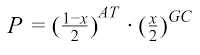

**Given:** A DNA string s of length at most 100 bp and an array A containing at most 20 numbers between 0 and 1.

**Return:** An array B having the same length as A in which B[k] represents the common logarithm of the probability that a random string constructed with the GC-content found in A[k] will match s exactly.

In [ ]:
# open the file
data=open('rosalind_prob.txt','r')
s=data.readline().strip()
A=[float(x) for x in data.readline().split()]

In [ ]:
from numpy import log10    
def randomStrings(s, A):
    result = []
    GC_count = s.count("G") + s.count("C")
    AT_count=s.count("A") + s.count("T")
    for p in A:
        result.append( GC_count * log10(p / 2) + AT_count * log10(0.5 - p / 2))
    return result

In [ ]:
randomStrings(s,A)

# Matching Random Motifs

**Given:** A positive integer N≤100000, a number x between 0 and 1, and a DNA string s of length at most 10 bp.

**Return:** The probability that if N random DNA strings having the same length as s are constructed with GC-content x (see “Introduction to Random Strings”), then at least one of the strings equals s. We allow for the same random string to be created more than once.

In [ ]:
# open the file
data=open('rosalind_rstr.txt','r')
info=[item for item in data.read().strip().split('\n')]
info

In [ ]:
N=90658
# #prob_gc
p=0.430628
s='GGCTCGAG'


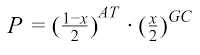

In [ ]:
from numpy import log10    
def randomStrings(s, p):
    GC_count = s.count("G") + s.count("C")
    AT_count=s.count("A") + s.count("T")
    # probability of GC content 
    s_prob =(((p) / 2)**GC_count)* (((1 - p) / 2)**AT_count) 
    # prob of no gc content
    no_gc=(1 - s_prob)**N
    # prob of at lease one gc-content
    prob = 1 - no_gc
    return round(prob,3)
randomStrings(s, p)

# Ordering Strings of Varying Length Lexicographically

**Problem**

Say that we have strings s=s1s2⋯sm and t=t1t2⋯tn with m<n. Consider the substring t′=t[1:m]. We have two cases:

If s=t′, then we set s<Lext because s is shorter than t (e.g., APPLE<APPLET).
Otherwise, s≠t′. We define s<Lext if s<Lext′ and define s>Lext if s>Lext′ (e.g., APPLET<LexARTS because APPL<LexARTS).

**Given:** A permutation of at most 12 symbols defining an ordered alphabet 𝒜 and a positive integer n (n≤4).

**Return:** All strings of length at most n formed from 𝒜, ordered lexicographically. (Note: As in “Enumerating k-mers Lexicographically”, alphabet order is based on the order in which the symbols are given.)

In [ ]:
# open file
data = open('rosalind_lexv.txt', 'r')
data=(data.read()).strip().split('\n')

string=''
for item in list(data[0]):
    if item !=' ':
        string+=item
n=int(data[1])
out=[]
# Enumerating
import itertools
for i in range(n+1):
    for item in itertools.product(string, repeat=i):
        out.append(str(item ).replace("'",'').replace(",",'').replace("(",'').replace(")",'').replace(" ",''))
        
# remove " "
for item in out:
    if len(item)<1:
        out.remove(item)
output = sorted(out,key=lambda word: [string.index(c) for c in word])
# print(str(output).replace("'",'').replace(",",'').replace("(",'').replace(")",'').replace(" ",''))
for item in output:
    print(item)

# k-Mer Composition

**Problem**

For a fixed positive integer k, order all possible k-mers taken from an underlying alphabet lexicographically.

Then the k-mer composition of a string s can be represented by an array A for which A[m] denotes the number of times that the mth k-mer (with respect to the lexicographic order) appears in s.

**Given:** A DNA string s in FASTA format (having length at most 100 kbp).

**Return:** The 4-mer composition of s.

In [ ]:
# all posible outcomes
string=['A','C','G','T']
n=4
outcome=[]
# Enumerating
import itertools
for item in itertools.product(string, repeat=n):
    
    outcome.append(item)
out=[]
for item in outcome:
    out.append(''.join(item))
# out

diction={}
for each in out:
    diction[each]=0
# diction

In [ ]:
# open file
data = open('rosalind_kmer.txt', 'r')
data=(data.read()).strip().split('\n')
# store all info to dictionaries
segments = {}
for line in data:
#     line = line.rstrip()
    if line[0] == '>':
        temp = line.strip('>')
        segments[temp] = ""    
    else:
        segments[temp] += line
    data=segments[temp]
segments

seq=[]
for item in segments.values():
    seq.append(item)
    
squence=''    
for s in seq:
    squence+=s
# squence

In [ ]:
new=[]
for i in range(len(squence)):
    if i+4<=len(squence):
        m=squence[i:i+4]
        if len(m)==4:
            new.append(m)
new=sorted(new) 
# new

In [ ]:
dic={}
l=[]
for item in new:
    if item not in l:
        number=1
        l.append(item)
        dic[item]=number
    else:
        number+=1
        dic[item]=number

In [ ]:
# diction
for key,value in dic.items():
#     print(key)
    for i in range(len( diction.keys())):
        if key == list(diction.keys())[i]:
#             print(list(diction.keys())[i])
            diction[key]=value
print(str(diction.values()).replace(',',''))

# Completing a Tree 

**Given:** A positive integer n (n≤1000) and an adjacency list corresponding to a graph on n nodes that contains no cycles.

**Return:** The minimum number of edges that can be added to the graph to produce a tree.

In [ ]:
# open file
data = open('rosalind_tree.txt', 'r')
data=(data.read()).splitlines()
# data

In [ ]:
# number of all nodes
n=int(data[0])
# each input indicates a edges, therefore as two nodes need one edge, three nodes need two edges:
output=n - len(data[1:]) - 1
output

# Genome Assembly as Shortest Superstring

**Problem**

For a collection of strings, a larger string containing every one of the smaller strings as a substring is called a ***superstring***.

By the assumption of parsimony, a shortest possible superstring over a collection of reads serves as a ***candidate chromosome***.

**Given:** 

At most 50 DNA strings of approximately equal length, not exceeding 1 kbp, in FASTA format (which represent reads deriving from the same strand of a single linear chromosome).

The dataset is guaranteed to satisfy the following condition: there exists a unique way to reconstruct the entire chromosome from these reads by gluing together pairs of reads that ***overlap by more than half their length***.

**Return:**

A shortest superstring containing all the given strings (thus corresponding to a reconstructed chromosome).

In [1]:
s1='ATTAGACCTG'
s2='CCTGCCGGAA'
s3='AGACCTGCCG'
s4='GCCGGAATAC'

string=[s1,s2,s3,s4]

In [2]:
info=[]
new=''
for n in range(len(string)):
    for q in range(n+1,len(string)):
        for i in range(len(string[n])):
            for j in range(i,len(string[n])):
                m1=string[n][i:j+1]
                if q<len(string):
                    if m1 in string[q] and len(m1)>len(string[q])/2:
                        info.append(m1)
info=list(set(info))
info

['GCCGGA',
 'CCTGCC',
 'AGACCT',
 'GCCGGAA',
 'CCTGCCG',
 'CTGCCG',
 'AGACCTG',
 'GACCTG',
 'CCGGAA']

In [3]:
new=[]
for i in range(len(info)):
    for j in range(i+1,len(info)):
        if info[i] in info[j]:
            info.remove(info[i])
            info.append('0')
#         print(i,j)

for item in info:
    if item == '0':
        info.remove(item)
info

['CCTGCC', 'GCCGGAA', 'CCTGCCG', 'CTGCCG', 'AGACCTG', 'GACCTG', 'CCGGAA', '0']

# Finding a Shared Spliced Motif

**Problem**

A string u is a common subsequence of strings s and t if the symbols of u appear in order as a subsequence of both s and t. For example, "ACTG" is a common subsequence of "AACCTTGG" and "ACACTGTGA".

Analogously to the definition of longest common substring, u is a longest common subsequence of s and t if there does not exist a longer common subsequence of the two strings. Continuing our above example, "ACCTTG" is a longest common subsequence of "AACCTTGG" and "ACACTGTGA", as is "AACTGG".

**Given:** Two DNA strings s and t (each having length at most 1 kbp) in FASTA format.

**Return:** A longest common subsequence of s and t. (If more than one solution exists, you may return any one.)

In [ ]:
# # read data from file
# data = open("rosalind_sseq.txt", "r")
# data=(data.read()).strip().split('\n')
# # store all info to dictionaries
# segments = {}
# for line in data:
# #     line = line.rstrip()
#     if line[0] == '>':
#         temp = line.strip('>')
#         segments[temp] = ""    
#     else:
#         segments[temp] += line
#     data=segments[temp]

# seq=[]
# for item in segments.values():
#     seq.append(item)
# s1=seq[0]

# s2=seq[1]
# s2

In [ ]:
s1='AACCTTGG'
s2='ACACTGTGA'

In [ ]:
from Bio import SeqIO
sequences = []
handle = open('rosalind_lcsq.txt', 'r')
for record in SeqIO.parse(handle, 'fasta'):
    sequences.append(str(record.seq))
s = sequences[0]
t = sequences[1]



lengths = [[0 for j in range(len(t) + 1)] for i in range(len(s) + 1)]
#creates array of len(s) containing arrays of len(t) filled with 0
for i, x in enumerate(s):
    for j, y in enumerate(t):
        if x == y:
            lengths[i + 1][j + 1] = lengths[i][j] + 1
        else:
            lengths[i + 1][j + 1] = max(lengths[i + 1][j], lengths[i][j + 1])


spliced_motif = ''
x, y = len(s), len(t)


while x * y != 0:
    if lengths[x][y] == lengths[x - 1][y]:
        x -= 1
    elif lengths[x][y] == lengths[x][y - 1]:
        y -= 1
    else:
        spliced_motif = s[x - 1] + spliced_motif
        x -= 1
        y -= 1
print(spliced_motif)

# Speeding Up Motif Finding

**Problem**
A prefix of a length n string s is a substring s[1:j]; a suffix of s is a substring s[k:n].

The failure array of s is an array P of length n for which P[k] is the length of the longest substring s[j:k] that is equal to some prefix s[1:k−j+1], where j cannot equal 1 (otherwise, P[k] would always equal k). By convention, P[1]=0.

**Given:** A DNA string s (of length at most 100 kbp) in FASTA format.

**Return:** The failure array of s.

In [ ]:
# from Bio import SeqIO
# sequences = []
# handle = open('rosalind_lcsq.txt', 'r')
# for record in SeqIO.parse(handle, 'fasta'):
#     sequences.append(str(record.seq))
# S = sequences[0]
# T = sequences[1]
S=s1
T=s2
cur = [''] * (len(T) + 1) #dummy entries as per wiki

for s in S:
    last, cur = cur, [''] 
    for i, t in enumerate(T):
        print(i,t)
        cur.append(last[i] + s if s==t else max(last[i+1], cur[-1], key=len))
# print (cur[-1])

# Edit Distance

In [ ]:
# read data from file
data = open("rosalind_edit.txt", "r")
data=(data.read()).strip().split('\n')
# store all info to dictionaries
segments = {}
for line in data:
#     line = line.rstrip()
    if line[0] == '>':
        temp = line.strip('>')
        segments[temp] = ""    
    else:
        segments[temp] += line
    data=segments[temp]

seq=[]
for item in segments.values():
    seq.append(item)
s1=seq[0]

s2=seq[1]
# s2
import nltk

print(nltk.edit_distance(s1, s2))

# Edit Distance Alignment

In [ ]:
s1='PRETTY'
s2='PRTTEIN'
print(nltk.edit_distance(s1, s2))

In [ ]:
align=nltk.edit_distance_align(s1, s2)
# align

In [ ]:
if align[0][0]==0:
    align.remove(align[0])
align

In [ ]:
out_s1=''
out_s2=''
for i in range(len(align)):
    if align[i][0]==align[i][1]:
        out_s1+=s1[align[i][0]-1]
        out_s2+=s2[align[i][1]-1]

#     elif align[i][0]>align[i][1]:
#         end=out_s2[-1]
#         out_s2 =out_s2[:-1] +'-'+end
#         out_s1+=s1[align[i][0]-1]
#         out_s2+='-'

#     elif align[i][0]<align[i][1]:
#         out_s1+='-'
#         out_s2+=s2[align[i][1]-1]
        
print(out_s1)  
print(out_s2) 